<a href="https://colab.research.google.com/github/dokin0802/SinGAN/blob/master/testadd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SinGAN
SinGAN is a ML library that allows you to do a lot of different things with one image as your dataset. As we’ve previously discussed usually you need a ton of images to be able to do anything in ML, so SinGAN needing only one image is a huge change.

It is, however, important to keep in mind what its outputs are. SinGAN, to me, is most like Photoshop’s Context Aware tools. It allows you to manipulate the single image in interesting ways, but in the end is only going to return you that same image, slightly modified. SinGAN is a bit of a Swiss Army Knife and that makes it pretty cool in a world of single-use ML tools.

Let’s take a look.

##Set up our Runtime
Colab needs to know we need to use a GPU-powered machine in order to do style transfers. At the top of this page, click on the `Runtime` tab, then select `Change runtime type`. In the modal that pops up, select `GPU` under the `Hardware accelerator` options.

In [1]:
!nvidia-smi -L

GPU 0: NVIDIA A100-SXM4-40GB (UUID: GPU-5eab3b96-ca68-143a-964d-7eba62e68d6b)


## Set up SinGAN
Let’s install the SinGAN repo and install all the dependencies needed

In [2]:
!git clone https://github.com/dokin0802/SinGAN
#!pip install torch==1.4.0 torchvision==0.5.0
!pip3 install torch
!pip3 install torchvision
%cd /content/SinGAN/

Cloning into 'SinGAN'...
remote: Enumerating objects: 951, done.
remote: Counting objects: 100% (145/145), done.
remote: Compressing objects: 100% (137/137), done.
remote: Total 951 (delta 69), reused 28 (delta 8), pack-reused 806
Receiving objects: 100% (951/951), 106.87 MiB | 12.30 MiB/s, done.
Resolving deltas: 100% (383/383), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/content/SinGAN


We now have SinGAN installed on CoLab. Here are some relevant links to understand how to use the library:

*   [SinGAN Github repo](https://github.com/tamarott/SinGAN)
*   [ArXiv paper](https://arxiv.org/pdf/1905.01164.pdf)
* [Supplementary Materials paper](https://tomer.net.technion.ac.il/files/2019/09/SingleImageGan_SM.pdf)





In [ ]:
import torch
print(torch.__version__)

2.0.1+cu118


In [ ]:
import torchvision
print(torchvision.__version__)

0.15.2+cu118


In [ ]:
import torchvision.transforms as transforms
from PIL import Image

PIL_tensor = transforms.ToTensor()
PIL_Image = Image.open("/content/SinGAN/Input/Images/g_65.jpg")

Image_tensor = PIL_tensor(PIL_Image)
#확인
Image_tensor

tensor([[[0.2431, 0.2471, 0.2510,  ..., 0.2510, 0.2392, 0.2392],
         [0.2353, 0.2392, 0.2431,  ..., 0.2510, 0.2431, 0.2431],
         [0.2275, 0.2314, 0.2314,  ..., 0.2510, 0.2431, 0.2431],
         ...,
         [0.1569, 0.1569, 0.1608,  ..., 0.7569, 0.7843, 0.7922],
         [0.1529, 0.1569, 0.1608,  ..., 0.8588, 0.7490, 0.8000],
         [0.1490, 0.1529, 0.1569,  ..., 0.8235, 0.8000, 0.8706]],

        [[0.3961, 0.4000, 0.4039,  ..., 0.4039, 0.3922, 0.3922],
         [0.3961, 0.4000, 0.4039,  ..., 0.4039, 0.4039, 0.4039],
         [0.4078, 0.4118, 0.4118,  ..., 0.4039, 0.4118, 0.4118],
         ...,
         [0.1373, 0.1373, 0.1412,  ..., 0.7098, 0.7569, 0.7176],
         [0.1333, 0.1373, 0.1412,  ..., 0.7961, 0.7451, 0.7608],
         [0.1294, 0.1333, 0.1373,  ..., 0.7647, 0.7490, 0.7843]],

        [[0.7059, 0.7098, 0.7137,  ..., 0.7137, 0.7020, 0.7020],
         [0.7059, 0.7098, 0.7137,  ..., 0.7137, 0.7137, 0.7137],
         [0.7098, 0.7137, 0.7137,  ..., 0.7137, 0.7176, 0.

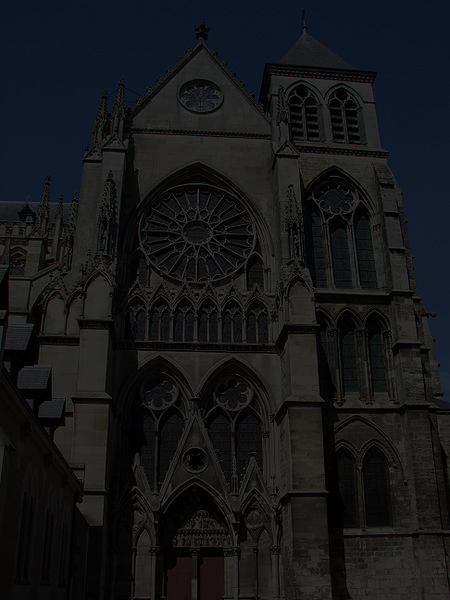

In [ ]:
tensor_PIL = transforms.ToPILImage()
image = tensor_PIL(Image_tensor*0.2)
image

##Training your image
In order to use SinGAN, we need to train the model on our image. In my experience this usually takes an hour or so to train a 250px image.

The `main_train.py` script takes one required argument, `--input_name`. To use with a custom image, upload an image to the `Input/Images` folder and then pass its name and file extension to the argument. 

In [3]:
!python main_train.py --input_name g_307.jpg --max_size 150

Random Seed:  5133
GeneratorConcatSkip2CleanAdd(
  (head): ConvBlock(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
    (norm): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (LeakyRelu): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (body): Sequential(
    (block1): ConvBlock(
      (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
      (norm): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (LeakyRelu): LeakyReLU(negative_slope=0.2, inplace=True)
    )
    (block2): ConvBlock(
      (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
      (norm): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (LeakyRelu): LeakyReLU(negative_slope=0.2, inplace=True)
    )
    (block3): ConvBlock(
      (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
      (norm): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   

##Generating Random Samples
By default, once training is completed 50 samples are generated. That means you don’t need to run the next line of code, unless you want to change some of the default options. 

Note: If you do run the next line of code, you’ll need to delete the folder of output images that were created during training. Otherwise you will get an error.

###Sample Options

####Number of Images
`--num_samples` (note: this only works in my version of the library)

You can pass in a number to generate any number of images. By default it generates 50. I recommend using this when running the `main_train.py` script otherwise you’ll need to delete the output folder and re-run it.

####Generator scale
`--gen_start_scale` (pass is a number, usually between 0–3)

I don’t want to dig into this too deeply, so I’ll just say the generator scale relates to how "realistic" the new images look. If you use `0` you will get images that differ drastically from your original image. If you use `2` or `3` the differences will be very subtle. Anything above these numbers will give you almost no changes.

####Mode
`--mode`
There are two. While the default `random_samples` generates images of the same size as your training image, `random_samples_arbitrary_sizes` changes the size of your canvas. It’s not a scaled up image, however, its more like it makes the canvas larger and tries to fill the space added with a similar texture.

####Scale of canvas
`--scale_h` (pass it a floating number)

`--scale_v` 

For use with `random_samples_arbitrary_sizes`, this allows you to define how much larger (or smaller) the canvas should be. you should pass it a floating value that scales each dimension up or down (`1.0` is the same size, `2.0` is twice as large, etc).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [8]:
!python main_train.py --input_name g_312.jpg --max_size 150

Random Seed:  5957
GeneratorConcatSkip2CleanAdd(
  (head): ConvBlock(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
    (norm): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (LeakyRelu): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (body): Sequential(
    (block1): ConvBlock(
      (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
      (norm): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (LeakyRelu): LeakyReLU(negative_slope=0.2, inplace=True)
    )
    (block2): ConvBlock(
      (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
      (norm): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (LeakyRelu): LeakyReLU(negative_slope=0.2, inplace=True)
    )
    (block3): ConvBlock(
      (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
      (norm): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   

In [13]:
!python main_train.py --input_name g_316.jpg --max_size 150

Random Seed:  1910
GeneratorConcatSkip2CleanAdd(
  (head): ConvBlock(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
    (norm): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (LeakyRelu): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (body): Sequential(
    (block1): ConvBlock(
      (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
      (norm): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (LeakyRelu): LeakyReLU(negative_slope=0.2, inplace=True)
    )
    (block2): ConvBlock(
      (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
      (norm): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (LeakyRelu): LeakyReLU(negative_slope=0.2, inplace=True)
    )
    (block3): ConvBlock(
      (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
      (norm): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   

In [19]:
!python main_train.py --input_name g_319.jpg --max_size 150

Random Seed:  44
GeneratorConcatSkip2CleanAdd(
  (head): ConvBlock(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
    (norm): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (LeakyRelu): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (body): Sequential(
    (block1): ConvBlock(
      (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
      (norm): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (LeakyRelu): LeakyReLU(negative_slope=0.2, inplace=True)
    )
    (block2): ConvBlock(
      (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
      (norm): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (LeakyRelu): LeakyReLU(negative_slope=0.2, inplace=True)
    )
    (block3): ConvBlock(
      (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
      (norm): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     

In [24]:
!python main_train.py --input_name g_326.jpg --max_size 150

Random Seed:  8463
GeneratorConcatSkip2CleanAdd(
  (head): ConvBlock(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
    (norm): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (LeakyRelu): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (body): Sequential(
    (block1): ConvBlock(
      (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
      (norm): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (LeakyRelu): LeakyReLU(negative_slope=0.2, inplace=True)
    )
    (block2): ConvBlock(
      (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
      (norm): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (LeakyRelu): LeakyReLU(negative_slope=0.2, inplace=True)
    )
    (block3): ConvBlock(
      (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
      (norm): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   

# 새 섹션

In [28]:
# example using the default random_samples mode
!python random_samples.py --input_name g_326.jpg --mode random_samples --gen_start_scale 1  --max_size 150

Random Seed:  7052


In [29]:
!zip -r /content/09.zip /content/SinGAN/Output/RandomSamples/g_326/gen_start_scale=1

  adding: content/SinGAN/Output/RandomSamples/g_326/gen_start_scale=1/ (stored 0%)
  adding: content/SinGAN/Output/RandomSamples/g_326/gen_start_scale=1/25.png (deflated 0%)
  adding: content/SinGAN/Output/RandomSamples/g_326/gen_start_scale=1/41.png (deflated 0%)
  adding: content/SinGAN/Output/RandomSamples/g_326/gen_start_scale=1/48.png (deflated 0%)
  adding: content/SinGAN/Output/RandomSamples/g_326/gen_start_scale=1/22.png (deflated 0%)
  adding: content/SinGAN/Output/RandomSamples/g_326/gen_start_scale=1/1.png (deflated 0%)
  adding: content/SinGAN/Output/RandomSamples/g_326/gen_start_scale=1/11.png (deflated 0%)
  adding: content/SinGAN/Output/RandomSamples/g_326/gen_start_scale=1/43.png (deflated 0%)
  adding: content/SinGAN/Output/RandomSamples/g_326/gen_start_scale=1/5.png (deflated 0%)
  adding: content/SinGAN/Output/RandomSamples/g_326/gen_start_scale=1/17.png (deflated 0%)
  adding: content/SinGAN/Output/RandomSamples/g_326/gen_start_scale=1/31.png (deflated 0%)
  adding:

In [ ]:
!zip -r /content/01.zip /content/SinGAN/Output/RandomSamples/009135/gen_start_scale=1

  adding: content/SinGAN/Output/RandomSamples/009135/gen_start_scale=1/ (stored 0%)
  adding: content/SinGAN/Output/RandomSamples/009135/gen_start_scale=1/81.png (deflated 0%)
  adding: content/SinGAN/Output/RandomSamples/009135/gen_start_scale=1/0.png (deflated 0%)
  adding: content/SinGAN/Output/RandomSamples/009135/gen_start_scale=1/50.png (deflated 0%)
  adding: content/SinGAN/Output/RandomSamples/009135/gen_start_scale=1/14.png (deflated 0%)
  adding: content/SinGAN/Output/RandomSamples/009135/gen_start_scale=1/67.png (deflated 0%)
  adding: content/SinGAN/Output/RandomSamples/009135/gen_start_scale=1/85.png (deflated 0%)
  adding: content/SinGAN/Output/RandomSamples/009135/gen_start_scale=1/59.png (deflated 0%)
  adding: content/SinGAN/Output/RandomSamples/009135/gen_start_scale=1/56.png (deflated 0%)
  adding: content/SinGAN/Output/RandomSamples/009135/gen_start_scale=1/49.png (deflated 0%)
  adding: content/SinGAN/Output/RandomSamples/009135/gen_start_scale=1/7.png (deflated 0%

In [ ]:
# example using the random_samples_arbitrary_sizes mode
# can only run at --gen_start_scale 0 (https://github.com/tamarott/SinGAN/issues/61)
!python random_samples.py --input_name 009135.jpg --mode random_samples_arbitrary_sizes --scale_h 2.0 

Random Seed:  1220


In [ ]:
!zip -r /content/02.zip /content/SinGAN/Output/RandomSamples_ArbitrerySizes/009135

  adding: content/SinGAN/Output/RandomSamples_ArbitrerySizes/009135/ (stored 0%)
  adding: content/SinGAN/Output/RandomSamples_ArbitrerySizes/009135/scale_v=1.000000_scale_h=2.000000/ (stored 0%)
  adding: content/SinGAN/Output/RandomSamples_ArbitrerySizes/009135/scale_v=1.000000_scale_h=2.000000/0.png (deflated 0%)
  adding: content/SinGAN/Output/RandomSamples_ArbitrerySizes/009135/scale_v=1.000000_scale_h=2.000000/14.png (deflated 0%)
  adding: content/SinGAN/Output/RandomSamples_ArbitrerySizes/009135/scale_v=1.000000_scale_h=2.000000/49.png (deflated 0%)
  adding: content/SinGAN/Output/RandomSamples_ArbitrerySizes/009135/scale_v=1.000000_scale_h=2.000000/7.png (deflated 0%)
  adding: content/SinGAN/Output/RandomSamples_ArbitrerySizes/009135/scale_v=1.000000_scale_h=2.000000/16.png (deflated 0%)
  adding: content/SinGAN/Output/RandomSamples_ArbitrerySizes/009135/scale_v=1.000000_scale_h=2.000000/27.png (deflated 0%)
  adding: content/SinGAN/Output/RandomSamples_ArbitrerySizes/009135/

##Generating Animations
SinGAN can generate an animation from the single image. It essentially create a noisy peturbation on the image causing it to animate.

Unfortunately, this requires another training session on the image. It should take the same amount of time as your previous training.

`--min_size` and `--max_size` can be used here as well.

In [ ]:
!python animation.py --input_name colusseum.png --max_size 256

Random Seed:  1601
GeneratorConcatSkip2CleanAdd(
  (head): ConvBlock(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
    (norm): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (LeakyRelu): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (body): Sequential(
    (block1): ConvBlock(
      (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
      (norm): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (LeakyRelu): LeakyReLU(negative_slope=0.2, inplace=True)
    )
    (block2): ConvBlock(
      (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
      (norm): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (LeakyRelu): LeakyReLU(negative_slope=0.2, inplace=True)
    )
    (block3): ConvBlock(
      (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
      (norm): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   

You can play the video in Colab by pointing the path to the following function (you may need to update the width and height arguments as well):

In [ ]:
def show_local_mp4_video(file_name, width=640, height=480):
  import io
  import base64
  from IPython.display import HTML
  video_encoded = base64.b64encode(io.open(file_name, 'rb').read())
  return HTML(data='''<video width="{0}" height="{1}" alt="test" controls>
                        <source src="data:video/mp4;base64,{2}" type="video/mp4" />
                      </video>'''.format(width, height, video_encoded.decode('ascii')))

show_local_mp4_video('/content/SinGAN/Output/Animation/colusseum/start_scale=2/alpha=0.100000_beta=0.800000.mp4', width=256, height=192)

###Animation Options

####Output type
`--output_type`

This allows you to output either `video` or `gif`. The default is `video`.

`--num_frames`

This determines the length of your animation. the default is `100` frames (10fps, so 10 seconds)

In [ ]:
!python animation.py --input_name colusseum.png --max_size 256 --output_type gif --num_frames 50